In [1]:
from scipy import interpolate

In [2]:
import sys
sys.path.append('../')
import models
import models.mnist
from data import get_loaders
from utils import DictWrapper

In [3]:
%load_ext autoreload
%autoreload 1

In [4]:
%aimport log_plotter
from log_plotter import get_run_names, get_data_pth_events ,get_run_names_events, get_data_pth, plot_smooth, plot_tag, plot_runs_and_tags, get_legend, plot_smooth_o1

In [5]:
no_title = True
save_single = True
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # 3
matplotlib.rcParams['ps.fonttype'] = 42  # 3
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [6]:
no_title = False
save_single = False
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3

# CIFAR10 bucket 16384

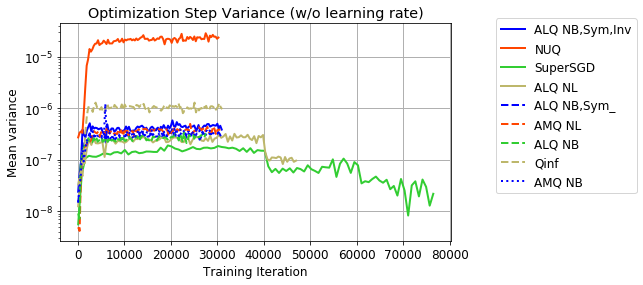

<Figure size 504x288 with 0 Axes>

In [29]:
get_data_f = get_data_pth_events
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/h/iman/Code/nuqsgd/runs'

#patterns = ['.*runs_cifar10_full/(sgd_00\d.*resnet32|uoptim2_.*resnet32.*nuq_bits_4.*nuq_bucket_size_65536.*nuq_method_(qinf|nuq3|nuq5|none).*nuq_layer_(1))']  # (?!.*scheduler)
# patterns = ['.*runs_imagenet_full/f90_']  # (?!.*scheduler)
# patterns = ['.*runs_cifar10_full/ms_.*g_osnap_iter_1000,.*dist_num_20,.*nuq_method_(qinf|nuq)']
patterns = ['.*runs_cifar10_full/.*f1_.*resnet110.*nuq_bits_3.*bucket_size_81.*']

# patterns = ['.*runs_cifar10_full/cifar_.*resnet32.*nuq_bits_4.*']
# tag_names = ['est_var', 'est_nvar', 'Vacc', 'loss', 'Vloss', 'co_error', 'grad_bias', 'levels/1']  # 'lr', 'gb_td', 'grad_bias',
tag_names = ['est_var']  # 'lr', 'gb_td', 'grad_bias',

fig_name = 'figs_nuq/resnet32.png'
lg_tags = ['estim_sgd', 'nuq_method', 'nuq_sym', 'nuq_inv']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
ylim = [None]*20
# ylim = [None]*2 + [[80, 100], [80, 100], [1e-7, 1], None]
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = False
save_single = True
ncolor = 4
lg_replace = [ ('estim_sgd', 'SGD'), ('ngpu_', 'GPU='), ('nuq_method', ''), ('_q', 'Q'), ('nuq_inv_', 'Inv'), ('nuq_sym', 'Sym'), ('_amq_nb', 'AMQ NB'), ('_amq', 'AMQ NL'), ('_alq_nb', 'ALQ NB'), ('_alq', 'ALQ NL'), ('_qinf', 'Qinf'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$'), ('_l2q', 'L2Q'), ('_none', 'SuperSGD'), ('nuq_layer_1', 'w/o layers'), ('nuq_layer_0', 'w/ layers'),('_nuq', 'NUQ')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single)